In [1]:
from PIL import Image
import torch
from transformers import AutoModelForCausalLM, AutoProcessor

# ---- Settings ----
model_path = "PaddlePaddle/PaddleOCR-VL"
image_path =r"D:\grins Docs\MIGRATION Class 12.jpg"
task = "ocr" # Options: 'ocr' | 'table' | 'chart' | 'formula'
# ------------------

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"



model = AutoModelForCausalLM.from_pretrained(
    model_path, trust_remote_code=True, torch_dtype=torch.bfloat16
).to(DEVICE).eval()



`torch_dtype` is deprecated! Use `dtype` instead!


In [2]:
processor = AutoProcessor.from_pretrained(model_path, trust_remote_code=True)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [3]:
image = Image.open(r"A:\insurance_claim_project\sample.jpeg").convert("RGB")

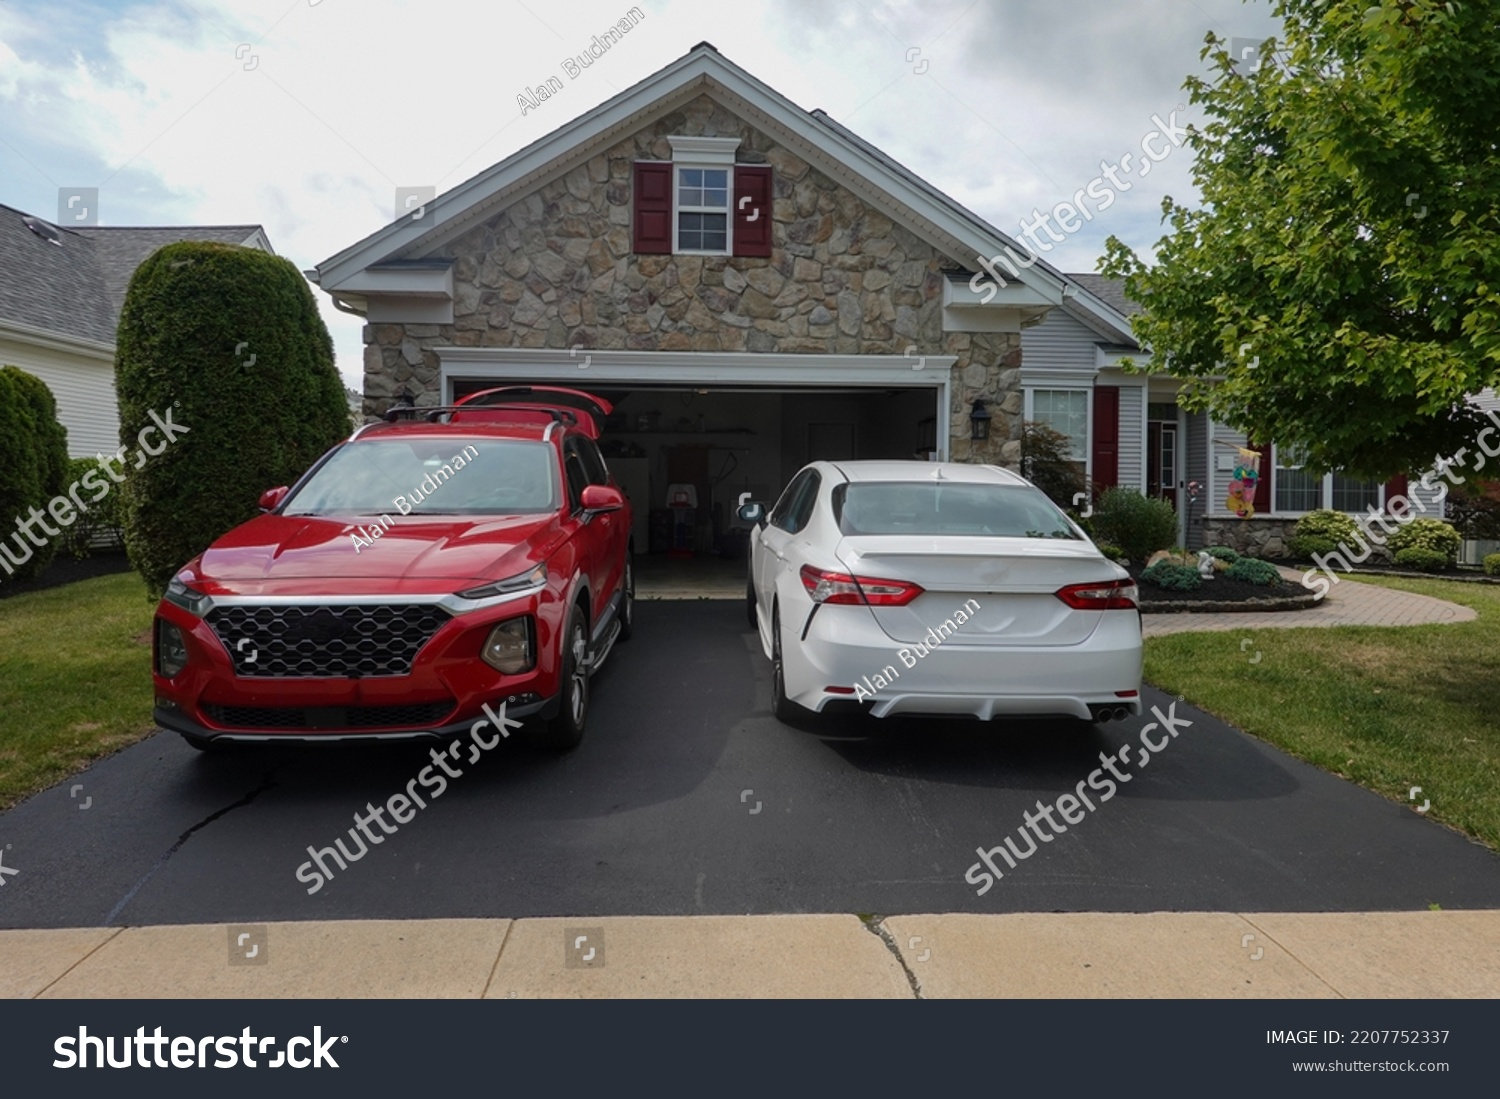

In [4]:
image

In [5]:
messages = [
    {"role": "user",         
     "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": "OCR:"},
        ]
    }
]
inputs = processor.apply_chat_template(
    messages, 
    tokenize=True, 
    add_generation_prompt=True, 	
    return_dict=True,
    return_tensors="pt"
).to(DEVICE)

In [6]:
DEVICE

'cuda'

In [ ]:
outputs = model.generate(**inputs, max_new_tokens=5)
outputs = processor.batch_decode(outputs, skip_special_tokens=True)[0]
print(outputs)